In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

data_dir = 'Spine/'

X = []
y = []

for folder in os.scandir(data_dir):
    print(folder)
   
  
    for entry in os.scandir(data_dir + folder.name):
        img = cv2.imread(data_dir + folder.name + '/' + entry.name, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.array(img, dtype='float32')
        img = img / 255
        X.append(img)
        if folder.name == 'normal':
            y.append(0)
        elif folder.name == 'osteophenia':
            y.append(1)
        else:
            y.append(2)


X = np.array(X)
y = np.array(y)


D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<DirEntry 'normal'>
<DirEntry 'osteophenia'>
<DirEntry 'osteoporosis'>


In [4]:
 


import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)

x = Dense(64, activation='relu')(x)


predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)


history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/30
5/5 [==============================] - 8s 1s/step - loss: 1.1210 - accuracy: 0.3741 - val_loss: 1.1151 - val_accuracy: 0.3143
Epoch 2/30
5/5 [==============================] - 4s 888ms/step - loss: 1.0701 - accuracy: 0.4101 - val_loss: 1.1147 - val_accuracy: 0.3714
Epoch 3/30
5/5 [==============================] - 4s 927ms/step - loss: 1.0415 - accuracy: 0.4964 - val_loss: 1.1386 - val_accuracy: 0.3143
Epoch 4/30
5/5 [==============================] - 4s 908ms/step - loss: 1.0349 - accuracy: 0.4676 - val_loss: 1.1222 - val_accuracy: 0.3429
Epoch 5/30
5/5 [==============================] - 4s 877ms/step - loss: 0.9641 - accuracy: 0.5180 - val_loss: 1.1174 - val_accuracy: 0.3714
Epoch 6/30
5/5 [==============================] - 4s 845ms/step - loss: 0.9826 - accuracy: 0.5540 - val_loss: 1.1173 - val_accuracy: 0.4000
Epoch 7/30
5/5 [==============================] - 4s 841ms/step - loss: 0.9064 - accuracy: 0.6187 - val_loss: 1.1158 - val_accuracy: 0.4000
Epoch 8/30
5/5 [=======

In [5]:
#

history1= model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32, shuffle=True)






Epoch 1/30
5/5 [==============================] - 5s 892ms/step - loss: 0.3509 - accuracy: 0.9137 - val_loss: 1.1241 - val_accuracy: 0.6000
Epoch 2/30
5/5 [==============================] - 4s 876ms/step - loss: 0.3254 - accuracy: 0.9137 - val_loss: 1.1184 - val_accuracy: 0.6000
Epoch 3/30
5/5 [==============================] - 4s 831ms/step - loss: 0.3017 - accuracy: 0.9137 - val_loss: 1.1566 - val_accuracy: 0.6000
Epoch 4/30
5/5 [==============================] - 4s 847ms/step - loss: 0.3316 - accuracy: 0.9065 - val_loss: 1.1691 - val_accuracy: 0.5143
Epoch 5/30
5/5 [==============================] - 4s 834ms/step - loss: 0.3053 - accuracy: 0.9496 - val_loss: 1.1614 - val_accuracy: 0.5429
Epoch 6/30
5/5 [==============================] - 4s 886ms/step - loss: 0.2632 - accuracy: 0.9640 - val_loss: 1.1160 - val_accuracy: 0.6286
Epoch 7/30
5/5 [==============================] - 4s 878ms/step - loss: 0.2735 - accuracy: 0.9640 - val_loss: 1.1623 - val_accuracy: 0.6286
Epoch 8/30
5/5 [====

In [6]:
history2 = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, shuffle=True)



Epoch 1/10
5/5 [==============================] - 5s 893ms/step - loss: 0.0944 - accuracy: 1.0000 - val_loss: 1.2631 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 4s 858ms/step - loss: 0.0821 - accuracy: 0.9928 - val_loss: 1.3254 - val_accuracy: 0.6286
Epoch 3/10
5/5 [==============================] - 4s 851ms/step - loss: 0.0856 - accuracy: 1.0000 - val_loss: 1.2820 - val_accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 4s 848ms/step - loss: 0.1030 - accuracy: 0.9856 - val_loss: 1.2548 - val_accuracy: 0.5714
Epoch 5/10
5/5 [==============================] - 4s 863ms/step - loss: 0.0919 - accuracy: 0.9928 - val_loss: 1.2938 - val_accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 4s 858ms/step - loss: 0.0851 - accuracy: 0.9928 - val_loss: 1.3768 - val_accuracy: 0.6286
Epoch 7/10
5/5 [==============================] - 4s 856ms/step - loss: 0.0781 - accuracy: 0.9928 - val_loss: 1.3567 - val_accuracy: 0.6000
Epoch 8/10
5/5 [====

In [7]:


history3 = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, shuffle=True)


Epoch 1/10
5/5 [==============================] - 4s 884ms/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 1.3713 - val_accuracy: 0.5714
Epoch 2/10
5/5 [==============================] - 4s 839ms/step - loss: 0.0763 - accuracy: 1.0000 - val_loss: 1.3681 - val_accuracy: 0.5714
Epoch 3/10
5/5 [==============================] - 4s 854ms/step - loss: 0.0663 - accuracy: 1.0000 - val_loss: 1.3784 - val_accuracy: 0.5714
Epoch 4/10
5/5 [==============================] - 4s 846ms/step - loss: 0.0478 - accuracy: 0.9928 - val_loss: 1.4015 - val_accuracy: 0.5714
Epoch 5/10
5/5 [==============================] - 4s 846ms/step - loss: 0.0524 - accuracy: 1.0000 - val_loss: 1.4036 - val_accuracy: 0.5429
Epoch 6/10
5/5 [==============================] - 4s 855ms/step - loss: 0.0543 - accuracy: 0.9928 - val_loss: 1.4040 - val_accuracy: 0.5714
Epoch 7/10
5/5 [==============================] - 4s 834ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 1.4157 - val_accuracy: 0.5429
Epoch 8/10
5/5 [====

In [8]:

history4 = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32, shuffle=True)

Epoch 1/5
5/5 [==============================] - 5s 1s/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 1.4432 - val_accuracy: 0.6000
Epoch 2/5
5/5 [==============================] - 4s 914ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 1.4145 - val_accuracy: 0.5714
Epoch 3/5
5/5 [==============================] - 5s 892ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 1.4627 - val_accuracy: 0.5714
Epoch 4/5
5/5 [==============================] - 4s 884ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 1.5096 - val_accuracy: 0.5714
Epoch 5/5
5/5 [==============================] - 4s 838ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 1.5100 - val_accuracy: 0.5714


In [9]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 1s 83ms/step - loss: 1.5100 - accuracy: 0.5714
Test Accuracy: 0.5714285969734192


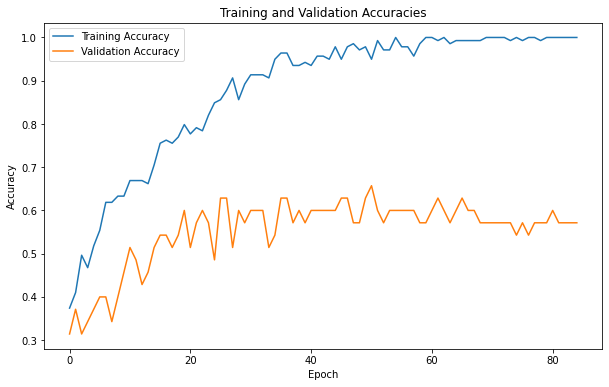

In [11]:
import matplotlib.pyplot as plt

# Combine histories
combined_history = {}
for i, history in enumerate([history, history1, history2, history3,history4]):
    for key in history.history:
        if key not in combined_history:
            combined_history[key] = []
        combined_history[key].extend(history.history[key])

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:

model.save("spine_mobilenetv2_no_aug.h5")

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
